In [1]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
churn=pd.read_csv('Churn_Modelling.csv')
df=pd.DataFrame(churn)
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
df.shape

(10000, 14)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [5]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [6]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [7]:
df.columns=df.columns.str.lower()
df.columns

Index(['rownumber', 'customerid', 'surname', 'creditscore', 'geography',
       'gender', 'age', 'tenure', 'balance', 'numofproducts', 'hascrcard',
       'isactivemember', 'estimatedsalary', 'exited'],
      dtype='object')

<Axes: xlabel='exited', ylabel='count'>

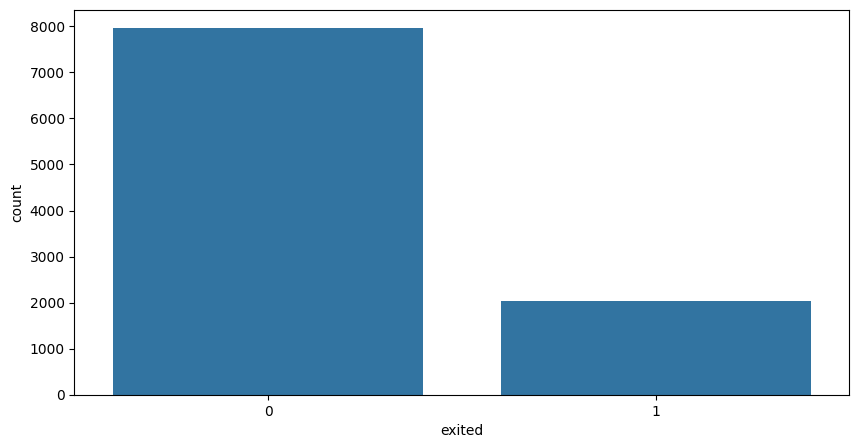

In [8]:
plt.figure(figsize=(10,5))
sns.countplot(data=df,x='exited')

In [9]:
X_train=df.drop(["exited"],axis=1)

In [10]:
df1=df.drop(["customerid","rownumber","surname"],axis=1)

In [11]:
from sklearn.model_selection import train_test_split
train_data,test_data=train_test_split(df1,test_size=0.2,random_state=21)
print("len of train data",len(train_data))
print("len of test data",len(test_data))

len of train data 8000
len of test data 2000


In [12]:
x_train=train_data.drop(["exited"],axis=1)
y_train=train_data["exited"]
#testing data
x_test=test_data.drop("exited",axis=1)
y_test=test_data["exited"]

In [13]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler,OneHotEncoder
num_feats=x_train.drop(["gender","geography"],axis=1)
num_feats_pipe=Pipeline([
    ("scaler",MinMaxScaler())
])
num_feats_preprocessed=num_feats_pipe.fit_transform(num_feats)
cat_feats=x_train[["gender","geography"]]
cat_feats_pipe=Pipeline([
    ("encoder",OneHotEncoder())
])
cat_feats_preprocessed=cat_feats_pipe.fit_transform(cat_feats)

In [14]:
from sklearn.compose import ColumnTransformer
num_list=list(num_feats)
cat_list=list(cat_feats)
final_pipeline=ColumnTransformer([
    ("num",num_feats_pipe,num_list),
     ("cat",cat_feats_pipe,cat_list)
])
x_train_preprocessed=final_pipeline.fit_transform(x_train)
x_train_preprocessed
x_test_preprocessed=final_pipeline.fit_transform(x_test)
x_test_preprocessed

array([[0.486     , 0.18918919, 0.3       , ..., 1.        , 0.        ,
        0.        ],
       [0.394     , 0.17567568, 0.9       , ..., 0.        , 0.        ,
        1.        ],
       [0.94      , 0.24324324, 0.4       , ..., 1.        , 0.        ,
        0.        ],
       ...,
       [0.596     , 0.5       , 0.1       , ..., 0.        , 0.        ,
        1.        ],
       [0.562     , 0.40540541, 0.1       , ..., 0.        , 1.        ,
        0.        ],
       [0.466     , 0.22972973, 0.8       , ..., 0.        , 1.        ,
        0.        ]])

In [16]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=21)
rf_model.fit(x_train_preprocessed,y_train)
y_test_pred_rf = rf_model.predict(x_test_preprocessed)

In [17]:
y_train_pred_rf = rf_model.predict(x_train_preprocessed)
y_train_pred_rf
y_test_pred_rf

array([0, 0, 0, ..., 0, 1, 0], dtype=int64)

In [18]:
from sklearn.metrics import f1_score
f1 = f1_score(y_train,y_train_pred_rf)
print("F1 Score of train data:", f1)

f2 = f1_score(y_test,y_test_pred_rf)
print("F1 Score of test data:", f2)

F1 Score of train data: 0.9996944699052857
F1 Score of test data: 0.5454545454545455


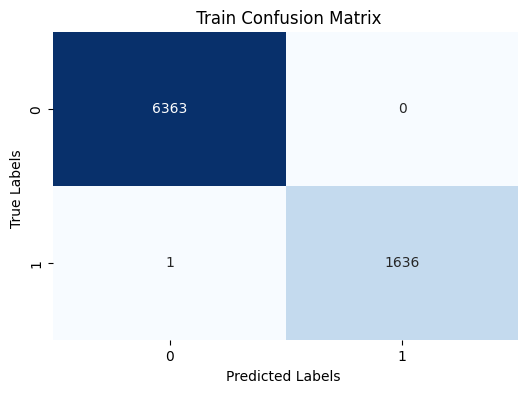

In [20]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_train, y_train_pred_rf)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted Labels ")
plt.ylabel("True Labels ")
plt.title(" Train Confusion Matrix")
plt.show()

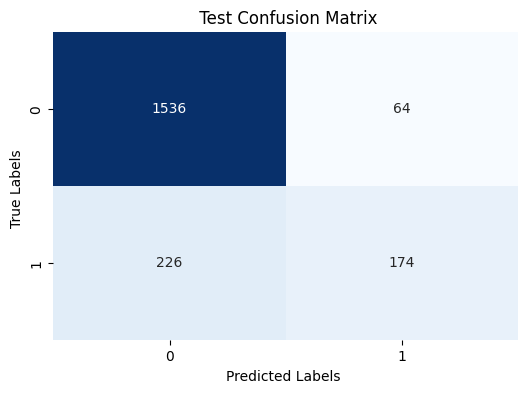

In [21]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_test_pred_rf)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted Labels ")
plt.ylabel("True Labels ")
plt.title(" Test Confusion Matrix")
plt.show()

In [22]:
feature_importances =rf_model.feature_importances_
print(len(X_train.columns))
print(len(feature_importances))
feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

13
13


In [23]:
top_n = 14
print(f"Top {top_n} Features:")
print(feature_importance_df.head(top_n))

Top 14 Features:
            Feature  Importance
1        customerid    0.245455
0         rownumber    0.144092
7            tenure    0.144072
3       creditscore    0.140353
4         geography    0.124076
2           surname    0.084575
6               age    0.038108
11   isactivemember    0.021190
5            gender    0.018669
10        hascrcard    0.011033
12  estimatedsalary    0.009930
9     numofproducts    0.009663
8           balance    0.008784


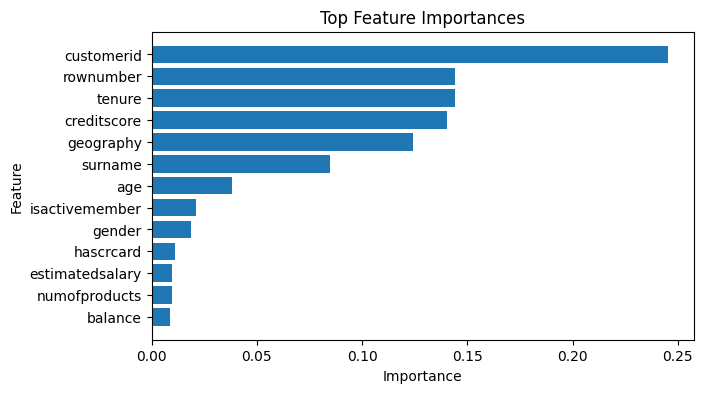

In [24]:
import matplotlib.pyplot as plt
plt.figure(figsize=(7, 4))
plt.barh(feature_importance_df['Feature'][:top_n], feature_importance_df['Importance'][:top_n])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Top Feature Importances')
plt.gca().invert_yaxis()  # Invert y-axis for better visualization
plt.show()

In [25]:
from sklearn.linear_model import LogisticRegression
lg_model=LogisticRegression()
lg_model.fit(x_train_preprocessed,y_train)

LogisticRegression()

In [26]:
y_train_pred_lg = lg_model.predict(x_train_preprocessed)
y_test_pred_lg = lg_model.predict(x_test_preprocessed)

In [27]:
from sklearn.metrics import f1_score


f1 = f1_score(y_train,y_train_pred_lg)
print("F1 Score of train data:", f1)

f2 = f1_score(y_test,y_test_pred_lg)
print("F1 Score of test data:", f2)

F1 Score of train data: 0.32310469314079426
F1 Score of test data: 0.29840142095914746


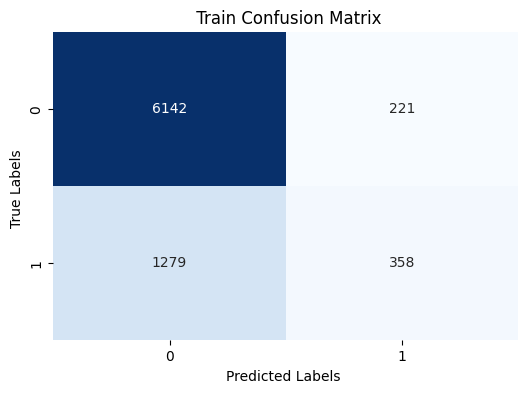

In [28]:
from sklearn.metrics import confusion_matrix

# Compute the confusion matrix
cm = confusion_matrix(y_train, y_train_pred_lg)

# Create a heatmap to visualize the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted Labels ")
plt.ylabel("True Labels ")
plt.title(" Train Confusion Matrix")
plt.show()

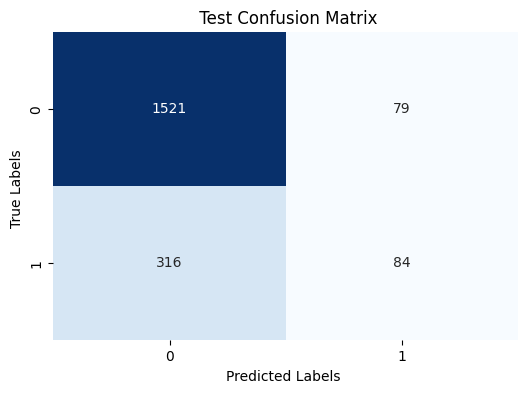

In [29]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_test_pred_lg)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted Labels ")
plt.ylabel("True Labels ")
plt.title(" Test Confusion Matrix")
plt.show()